# Setup

This is the main jupiter notebook, which is always needed in order to use the other available ipynb files under the src directory.

In [1]:
from all_imports import *

import _modules


_modules.test1()

#Prints all available functions of the _modules folder, generally ignores the '__init__.py', additional files can be added as str in a list.
_modules.print_functions_folder(modules_folder='_modules') #ignore_files=['__init__.py']



 ### test init### 
 ### test ### 
c:\Users\gottk\OneDrive\GITHUB\calma-esse-heat-stress-internal\Esse\src
{'plots': ['Plot_heatmap_participant_data',
           'Plot_linechart_participant_data',
           'Plot_plotly_heatmap_participant_data',
           'haversine_vector',
           'pprint'],
 'utilities': ['folder_variable_setup',
               'haversine_vector',
               'pprint',
               'print_functions_folder',
               'query_participants_data',
               'test1']}


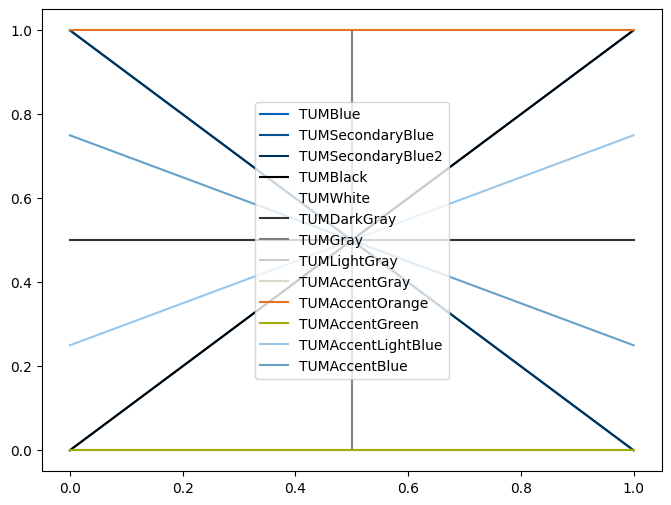

In [2]:
# Test the colors
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], color=_modules.TUMBlue, label='TUMBlue')
plt.plot([0, 1], [1, 0], color=_modules.TUMSecondaryBlue, label='TUMSecondaryBlue')
plt.plot([1, 0], [0, 1], color=_modules.TUMSecondaryBlue2, label='TUMSecondaryBlue2')
plt.plot([1, 0], [1, 0], color=_modules.TUMBlack, label='TUMBlack')
plt.plot([0.5, 0.5], [0, 1], color=_modules.TUMWhite, label='TUMWhite')
plt.plot([0, 1], [0.5, 0.5], color=_modules.TUMDarkGray, label='TUMDarkGray')
plt.plot([0.5, 0.5], [1, 0], color=_modules.TUMGray, label='TUMGray')
plt.plot([0, 1], [0, 0], color=_modules.TUMLightGray, label='TUMLightGray')
plt.plot([1, 0], [1, 1], color=_modules.TUMAccentGray, label='TUMAccentGray')
plt.plot([0, 1], [1, 1], color=_modules.TUMAccentOrange, label='TUMAccentOrange')
plt.plot([1, 0], [0, 0], color=_modules.TUMAccentGreen, label='TUMAccentGreen')
plt.plot([0, 1], [0.25, 0.75], color=_modules.TUMAccentLightBlue, label='TUMAccentLightBlue')
plt.plot([1, 0], [0.25, 0.75], color=_modules.TUMAccentBlue, label='TUMAccentBlue')
plt.legend()
plt.show()

# Cozie

In [3]:
# <--- Settings --->
YOUR_TIMEZONE = 'Asia/Singapore'
ID_EXPERIMENT = 'esse'
WEEKS = "100"  # Number of weeks from which the data is retrieved, ending now, i.e., start date look up: now - WEEKS, end date look up: now

lst_participants = ['esse00', 'esse02', 'esse07', 'esse08', 'esse09', 'esse10', 'esse11', 'esse13', 'esse14'] 

toggle_local_data = False #This determines if you want to use already locally stored data (defined in man_identifier), or if the new data should be pulled from Cozie. 
%store toggle_local_data
#'True' - Take manual data
#'False' - Take recent data
man_identifier = '2024-02-26_1023'
%store man_identifier


#Enables additional print statements
#toggle_debugging = True

# <--- Config.py --->
#Store the not publicly available variables needed that are set in the config.py file
API_KEY = _modules.API_KEY


# <--- Directories --->
#Store all necessary folder paths for the directory
(
    directory_path,
    directory_data_raw_path,
    directory_data_processed_path,
    directory_report_path,
    identifier,
    directory_data_ws_path
) = _modules.folder_variable_setup()

pprint([directory_path, directory_data_raw_path, directory_data_processed_path, directory_report_path, identifier, directory_data_ws_path])
%store directory_path
%store directory_data_raw_path
%store directory_data_processed_path
%store directory_report_path
%store identifier
%store directory_data_ws_path

print(directory_data_raw_path)


Stored 'toggle_local_data' (bool)
Stored 'man_identifier' (str)
2024-03-14_1049
['c:\\Users\\gottk\\OneDrive\\GITHUB\\calma-esse-heat-stress-internal\\Esse\\src',
 'c:\\Users\\gottk\\OneDrive\\GITHUB\\calma-esse-heat-stress-internal\\Esse\\data\\raw',
 'c:\\Users\\gottk\\OneDrive\\GITHUB\\calma-esse-heat-stress-internal\\Esse\\data\\processed',
 'c:\\Users\\gottk\\OneDrive\\GITHUB\\calma-esse-heat-stress-internal\\Esse\\report',
 '2024-03-14_1049',
 'c:\\Users\\gottk\\OneDrive\\GITHUB\\calma-esse-heat-stress-internal\\Esse\\data\\watch_surveys']
Stored 'directory_path' (str)
Stored 'directory_data_raw_path' (str)
Stored 'directory_data_processed_path' (str)
Stored 'directory_report_path' (str)
Stored 'identifier' (str)
Stored 'directory_data_ws_path' (str)
c:\Users\gottk\OneDrive\GITHUB\calma-esse-heat-stress-internal\Esse\data\raw


In [4]:
# <--- Load Data and Organize Cozie Data --->
#This queries all defined participants in lst_participants and stores it into a dictionary.
if toggle_local_data == True:
    print('>>> no Cozie data was retreived')   
else:
    man_identifier = ''
    participant_data = _modules.query_participants_data(lst_participants, YOUR_TIMEZONE, ID_EXPERIMENT, WEEKS, API_KEY)
    print('>>> new Cozie was pulled')

    #Here the data will be stored based on the identifier (time) under 'data\raw' which can be later retreived again, for faster processing.
    directory_data_raw_identifier = os.path.join(directory_data_raw_path, identifier)
    if not os.path.exists(directory_data_raw_identifier):
        os.makedirs(directory_data_raw_identifier)

    print(identifier)
    result_dfs = []
    for participant_id, df in participant_data.items():

        result_df_participant = df 
        result_dfs.append(result_df_participant)
        
        # Define the file path for the CSV within identifier directory
        csv_filename = f"Cozie_participant_{participant_id}.csv"
        csv_path = os.path.join(directory_data_raw_identifier, csv_filename)
        result_df_participant.to_csv(csv_path, index=False)


#Reload the data, into the participant_data_local dictionary - if no manual idenfitifer is defined, the previously saved data is stored.
participant_data_local = {}

#Check conditions
if toggle_local_data == True and man_identifier is not None:

#Load locally stored data
    directory_saved_data = os.path.join(directory_data_raw_path, man_identifier)
    # Check if it is available
    if os.path.exists(directory_saved_data):
        for filename in os.listdir(directory_saved_data):
            if filename.endswith(".csv"):
                print(filename)
                # Extract participant ID from the filename
                participant_id = filename.split("_")[2].split(".")[0]

                # Read CSV file into a DataFrame
                csv_path = os.path.join(directory_saved_data, filename)
                df = pd.read_csv(csv_path, low_memory=False) #Low memory false: cause pandas to read the entire file into memory at once, potentially using more memory but better type inference.

                # Add DataFrame to participant_data dictionary
                participant_data_local[participant_id] = df
        print('>>> Reloaded data into the participant_data_local from local data')
else:
    #Load locally stored data, which has been just retreived from Cozie
    directory_saved_data = directory_data_raw_identifier
    # Check if it is available
    if os.path.exists(directory_saved_data):
        for filename in os.listdir(directory_saved_data):
            if filename.endswith(".csv"):
                print(filename)
                # Extract participant ID from the filename
                participant_id = filename.split("_")[2].split(".")[0]

                # Read CSV file into a DataFrame
                csv_path = os.path.join(directory_saved_data, filename)
                df = pd.read_csv(csv_path, low_memory=False) #Low memory false: cause pandas to read the entire file into memory at once, potentially using more memory but better type inference.

                # Add DataFrame to participant_data dictionary
                participant_data_local[participant_id] = df
                
        print('>>> Reloaded data into the participant_data_local from recent Cozie data')

#Store the dataframe
%store participant_data_local
#TODO Add Stats here about the dataframe and display it in graphs - new file for that 'Dashboard'

esse00
esse02
esse07
esse08
esse09
esse10
esse11
esse13
esse14
>>> new Cozie was pulled
2024-03-14_1049
Cozie_participant_esse00.csv
Cozie_participant_esse02.csv
Cozie_participant_esse07.csv
Cozie_participant_esse08.csv
Cozie_participant_esse09.csv
Cozie_participant_esse10.csv
Cozie_participant_esse11.csv
Cozie_participant_esse13.csv
Cozie_participant_esse14.csv
>>> Reloaded data into the participant_data_local from recent Cozie data
Stored 'participant_data_local' (dict)


# Scoria


In [5]:
# Sample DataFrame
import plotly.graph_objects as go

# Define nodes
nodes = ['A', 'B', 'C', 'D', 'E']

# Define links
links = [
    {'source': 0, 'target': 1, 'value': 20},  # A -> B
    {'source': 0, 'target': 2, 'value': 10},  # A -> C
    {'source': 1, 'target': 3, 'value': 15},  # B -> D
    {'source': 1, 'target': 4, 'value': 5},   # B -> E
]

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        label=nodes
    ),
    link=dict(
        source=[link['source'] for link in links],
        target=[link['target'] for link in links],
        value=[link['value'] for link in links]
    )
)])

# Update layout
fig.update_layout(title_text="Basic Sankey Diagram")

# Show plot
fig.show()